In [9]:
import requests
import numpy as np
import pylab as pl

In [10]:
main_url = 'https://pokeapi.co/api/v2/berry/'

In [11]:
response = requests.get( main_url )
response

<Response [200]>

In [12]:
# Un codigo 200 indica que se obtuvieron datos satisfactoriamente
try:
    if response.status_code == 200:
        payload = response.json()
        berries_number = payload.get( 'count', [] )
        
        print('There is {} berries in the dataset'.format( berries_number ))
except:
    print('ERROR! Something went wrong while loading data')
    

There is 64 berries in the dataset


In [13]:
# Obtengo los datos de las berries
berri_names      = []
berri_grow_times = []
for k in range(berries_number+1):
    berri_response = requests.get( main_url + str(k) )
    
    if berri_response.status_code == 200:
        berri_payload       = berri_response.json()
        berri_name          = berri_payload.get( 'name', [] )
        berri_growth_time   = berri_payload.get( 'growth_time', [] )
        print( 'Berri {} ---> {} with grow time of {}'.format(k, berri_name, berri_growth_time) )
        
        # Guardo los datos en listas:
        berri_names.append( berri_name )
        berri_grow_times.append( berri_growth_time )

Berri 1 ---> cheri with grow time of 3
Berri 2 ---> chesto with grow time of 3
Berri 3 ---> pecha with grow time of 3
Berri 4 ---> rawst with grow time of 3
Berri 5 ---> aspear with grow time of 3
Berri 6 ---> leppa with grow time of 4
Berri 7 ---> oran with grow time of 4
Berri 8 ---> persim with grow time of 4
Berri 9 ---> lum with grow time of 12
Berri 10 ---> sitrus with grow time of 8
Berri 11 ---> figy with grow time of 5
Berri 12 ---> wiki with grow time of 5
Berri 13 ---> mago with grow time of 5
Berri 14 ---> aguav with grow time of 5
Berri 15 ---> iapapa with grow time of 5
Berri 16 ---> razz with grow time of 2
Berri 17 ---> bluk with grow time of 2
Berri 18 ---> nanab with grow time of 2
Berri 19 ---> wepear with grow time of 2
Berri 20 ---> pinap with grow time of 2
Berri 21 ---> pomeg with grow time of 8
Berri 22 ---> kelpsy with grow time of 8
Berri 23 ---> qualot with grow time of 8
Berri 24 ---> hondew with grow time of 8
Berri 25 ---> grepa with grow time of 8
Berri 2

In [14]:
# Convierto los valores de crecimiento en un arreglo de numpy
berri_grow_times = np.asarray( berri_grow_times )
berri_grow_times

array([ 3,  3,  3,  3,  3,  4,  4,  4, 12,  8,  5,  5,  5,  5,  5,  2,  2,
        2,  2,  2,  8,  8,  8,  8,  8,  8,  6,  6,  6,  6, 15, 15, 15, 15,
       15, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24])

In [15]:
# Creo el diccionario con la informacion
unique, counts = np.unique(berri_grow_times, return_counts=True)
frequency = list(zip(unique, counts))

berries_dicc = {
    "berries_names": berri_names,
    "min_growth_time": str( min( berri_grow_times ) ),
    "median_growth_time": str( np.median( berri_grow_times ) ),
    "max_growth_time": str( max( berri_grow_times ) ),
    "variance_growth_time": str( np.var( berri_grow_times ) ),
    "mean_growth_time": str( np.mean( berri_grow_times ) ),
    "frequency_growth_time": str( frequency )
}
berries_dicc

{'berries_names': ['cheri',
  'chesto',
  'pecha',
  'rawst',
  'aspear',
  'leppa',
  'oran',
  'persim',
  'lum',
  'sitrus',
  'figy',
  'wiki',
  'mago',
  'aguav',
  'iapapa',
  'razz',
  'bluk',
  'nanab',
  'wepear',
  'pinap',
  'pomeg',
  'kelpsy',
  'qualot',
  'hondew',
  'grepa',
  'tamato',
  'cornn',
  'magost',
  'rabuta',
  'nomel',
  'spelon',
  'pamtre',
  'watmel',
  'durin',
  'belue',
  'occa',
  'passho',
  'wacan',
  'rindo',
  'yache',
  'chople',
  'kebia',
  'shuca',
  'coba',
  'payapa',
  'tanga',
  'charti',
  'kasib',
  'haban',
  'colbur',
  'babiri',
  'chilan',
  'liechi',
  'ganlon',
  'salac',
  'petaya',
  'apicot',
  'lansat',
  'starf',
  'enigma',
  'micle',
  'custap',
  'jaboca',
  'rowap'],
 'min_growth_time': '2',
 'median_growth_time': '15.0',
 'max_growth_time': '24',
 'variance_growth_time': '61.495849609375',
 'mean_growth_time': '12.859375',
 'frequency_growth_time': '[(2, 5), (3, 5), (4, 3), (5, 5), (6, 4), (8, 7), (12, 1), (15, 5), (18,

Text(0.5, 1.0, "Berri's Grow Times Histogram")

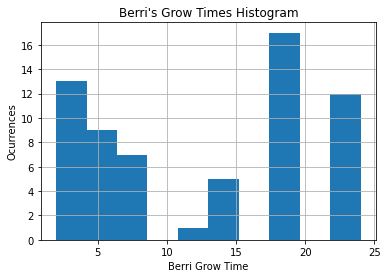

In [16]:
# Hago un histograma para mostrar los datos
pl.figure()
pl.hist(berri_grow_times)
pl.grid()
pl.xlabel('Berri Grow Time')
pl.ylabel('Ocurrences')
pl.title("Berri's Grow Times Histogram")

In [28]:
import json

# Armo el diccionrio JSON
json_data = {}
for k in range(berries_number+1):
    json_data[k] = {
        'name' : berri_names[k-1],
        'grow_time' : int(berri_grow_times[k-1]),
    }

json_object = json.dumps(json_data, indent = 4) 
print(json.loads(json_object))

{'0': {'name': 'rowap', 'grow_time': 24}, '1': {'name': 'cheri', 'grow_time': 3}, '2': {'name': 'chesto', 'grow_time': 3}, '3': {'name': 'pecha', 'grow_time': 3}, '4': {'name': 'rawst', 'grow_time': 3}, '5': {'name': 'aspear', 'grow_time': 3}, '6': {'name': 'leppa', 'grow_time': 4}, '7': {'name': 'oran', 'grow_time': 4}, '8': {'name': 'persim', 'grow_time': 4}, '9': {'name': 'lum', 'grow_time': 12}, '10': {'name': 'sitrus', 'grow_time': 8}, '11': {'name': 'figy', 'grow_time': 5}, '12': {'name': 'wiki', 'grow_time': 5}, '13': {'name': 'mago', 'grow_time': 5}, '14': {'name': 'aguav', 'grow_time': 5}, '15': {'name': 'iapapa', 'grow_time': 5}, '16': {'name': 'razz', 'grow_time': 2}, '17': {'name': 'bluk', 'grow_time': 2}, '18': {'name': 'nanab', 'grow_time': 2}, '19': {'name': 'wepear', 'grow_time': 2}, '20': {'name': 'pinap', 'grow_time': 2}, '21': {'name': 'pomeg', 'grow_time': 8}, '22': {'name': 'kelpsy', 'grow_time': 8}, '23': {'name': 'qualot', 'grow_time': 8}, '24': {'name': 'hondew'

In [22]:
print(json_data)

{0: {'name': 'rowap', 'grow_time': 24}, 1: {'name': 'cheri', 'grow_time': 3}, 2: {'name': 'chesto', 'grow_time': 3}, 3: {'name': 'pecha', 'grow_time': 3}, 4: {'name': 'rawst', 'grow_time': 3}, 5: {'name': 'aspear', 'grow_time': 3}, 6: {'name': 'leppa', 'grow_time': 4}, 7: {'name': 'oran', 'grow_time': 4}, 8: {'name': 'persim', 'grow_time': 4}, 9: {'name': 'lum', 'grow_time': 12}, 10: {'name': 'sitrus', 'grow_time': 8}, 11: {'name': 'figy', 'grow_time': 5}, 12: {'name': 'wiki', 'grow_time': 5}, 13: {'name': 'mago', 'grow_time': 5}, 14: {'name': 'aguav', 'grow_time': 5}, 15: {'name': 'iapapa', 'grow_time': 5}, 16: {'name': 'razz', 'grow_time': 2}, 17: {'name': 'bluk', 'grow_time': 2}, 18: {'name': 'nanab', 'grow_time': 2}, 19: {'name': 'wepear', 'grow_time': 2}, 20: {'name': 'pinap', 'grow_time': 2}, 21: {'name': 'pomeg', 'grow_time': 8}, 22: {'name': 'kelpsy', 'grow_time': 8}, 23: {'name': 'qualot', 'grow_time': 8}, 24: {'name': 'hondew', 'grow_time': 8}, 25: {'name': 'grepa', 'grow_tim